### Desafío 2. Rendimiento escolar

<br>

Nombre: **Julio Valdés**

Profesor: Gabriel Tamayo

Generación: **G5**


## Hito 1

### Preliminares
#### Descripción del problema y objetivos
* Se desea identificar aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar, a partir de un conjunto de variables sociodemográficas y conductuales de los alumnos. Además se buscan categorías latentes a partir de preguntas asociadas a aspectos ambientales del alumno. 
* El tipo de problema a resolver es de regresión.
* El objetivo de este trabajo es desarrollar un modelo predictivo para obtener el promedio final de un alumno en base a una serie de atributos sociodemográficos y conductuales. Además evaluar la existencia de factores latentes en preguntas de aspectos ambientales del alumno.

#### Descripción de la solución
* Se realizará un análisis descriptivo sobre las diferentes variables sociodemográficas y conductuales.
* Se eliminarán valores nulos.
* Se recodificarán las variables de acuerdo a lo indicado en "Aspectos adicionales a considerar".
* Se estandarizarán las variables que correspondan.
* Se evaluará la existencia de factores latentes en preguntas de aspectos ambientales del alumno.
* Se construirá un modelo descriptivo de regresión lineal que considere a todas las variables sociodemográficas y conductuales. El modelo será optimizado considerando las variables que tengan mayor correlación con la variable dependiente.
* Se construirá un modelo predictivo de regresión lineal que considere las variables resultantes del modelo descriptivo anterior. El modelo será entrenado con un 67% de los datos y validado con el 33% de estos. El modelo será evaluado de acuerdo a las métricas de Error Cuadrático Promedio y R2.
* En base a la evaluación anterior se establecerán las conclusiones.

### Aspectos computacionales
#### Descripción de librerías y módulos
Se usarán las siguientes librerías y módulos por cada etapa de la construcción del modelo:
* ingesta: pandas
* preprocesamiento: pandas, numpy, missingno
* visualización: matplotlib, seaborn
* modelación: statsmodels.api, statsmodels.formula.api, sklearn.preprocessing, sklearn.linear_model, sklearn.model_selection
* métricas de evaluación: sklearn.metrics

## Hito 2

### Descripción

#### Se importa la BD y se imprimen las primeras 5 filas a modo de ejemplo

In [193]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo

# statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

# sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# factor_analyzer
import factor_analyzer as factor

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

df = pd.read_csv('students.csv', sep='|').drop('Unnamed: 0', axis=1)
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


#### Se realiza el preprocesamiento de las variables

In [194]:
df = df.replace(["nulidade", "sem validade", "zero"], [np.nan, np.nan, np.nan])
df['age'] = df['age'].str.replace('"', '')
df['goout'] = df['goout'].str.replace('"', '')
df['health'] = df['health'].str.replace('"', '')
df["age"] = pd.to_numeric(df["age"])
df["Medu"] = pd.to_numeric(df["Medu"])
df["Fedu"] = pd.to_numeric(df["Fedu"])
df["traveltime"] = pd.to_numeric(df["traveltime"])
df["studytime"] = pd.to_numeric(df["studytime"])
df["failures"] = pd.to_numeric(df["failures"])
df["famrel"] = pd.to_numeric(df["famrel"])
df["freetime"] = pd.to_numeric(df["freetime"])
df["goout"] = pd.to_numeric(df["goout"])
df["Dalc"] = pd.to_numeric(df["Dalc"])
df["Walc"] = pd.to_numeric(df["Walc"])
df["health"] = pd.to_numeric(df["health"])
df["absences"] = pd.to_numeric(df["absences"])
df["G1"] = pd.to_numeric(df["G1"])
df["G2"] = pd.to_numeric(df["G2"])
df["G3"] = pd.to_numeric(df["G3"])

#### Se realiza la inspección visual del vector objetivo y de las variables contínuas

In [195]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,391.000000,392.000000,390.000000,392.000000,390.000000,390.000000,390.000000,393.000000,390.000000,392.000000,390.000000,391.000000,391.000000,391.000000,395.000000,392.000000
mean,16.698210,2.742347,2.525641,1.451531,2.038462,0.335897,3.948718,3.229008,3.102564,1.482143,2.294872,3.570332,5.731458,10.933504,10.713924,10.446429
std,1.279412,1.095185,1.088906,0.699066,0.842970,0.746883,0.896973,0.996664,1.117629,0.893104,1.293736,1.377303,8.025089,3.320593,3.761505,4.568007
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.500000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Se realiza la inspección visual de las variables categóricas

In [196]:
for var in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    print(var)
    print(df[var].value_counts('%'))

school
GP    0.884615
MS    0.115385
Name: school, dtype: float64
sex
F    0.52551
M    0.47449
Name: sex, dtype: float64
address
U    0.776081
R    0.223919
Name: address, dtype: float64
famsize
GT3    0.710997
LE3    0.289003
Name: famsize, dtype: float64
Pstatus
T    0.897172
A    0.102828
Name: Pstatus, dtype: float64
Mjob
other       0.354756
services    0.262211
at_home     0.151671
teacher     0.146530
health      0.084833
Name: Mjob, dtype: float64
Fjob
other       0.549367
services    0.281013
teacher     0.073418
at_home     0.050633
health      0.045570
Name: Fjob, dtype: float64
reason
course        0.368286
home          0.276215
reputation    0.263427
other         0.092072
Name: reason, dtype: float64
guardian
mother    0.690537
father    0.227621
other     0.081841
Name: guardian, dtype: float64
schoolsup
no     0.870801
yes    0.129199
Name: schoolsup, dtype: float64
famsup
yes    0.612821
no     0.387179
Name: famsup, dtype: float64
paid
no     0.543147
yes    0.45685

#### Se calcula y grafica la correlación de las variables
* Se observa una alta correlación entre los promedios G1, G2 y G3
* Se observa una alta correlación entre el nivel educacional de la madre y el del padre
* Se observa una alta correlación entre el consumo de alcohol en la semana con el del fin de semana
* Se observa una alta correlación entre el consumo de alcohol el fin de semana y la salida con amigos

In [197]:
corr_mat = df.corr()
corr_mat

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.167015,-0.171418,0.068276,0.000939,0.245542,0.055171,0.016832,0.123434,0.129071,0.126035,-0.052043,0.171972,-0.067711,-0.141697,-0.151281
Medu,-0.167015,1.000000,0.623658,-0.172317,0.070945,-0.232054,0.003077,0.028947,0.066094,0.023131,-0.049330,-0.032245,0.102970,0.193389,0.209363,0.206274
Fedu,-0.171418,0.623658,1.000000,-0.156633,-0.000988,-0.253699,-0.007223,-0.022691,0.053343,0.010603,-0.002497,0.021310,0.023769,0.183592,0.166323,0.147424
traveltime,0.068276,-0.172317,-0.156633,1.000000,-0.097773,0.097450,-0.014399,-0.010801,0.029055,0.135563,0.126178,0.001518,-0.017003,-0.098264,-0.152342,-0.112332
studytime,0.000939,0.070945,-0.000988,-0.097773,1.000000,-0.177134,0.030327,-0.148808,-0.067799,-0.204538,-0.252974,-0.087647,-0.057211,0.165170,0.134902,0.090897
failures,0.245542,-0.232054,-0.253699,0.097450,-0.177134,1.000000,-0.048290,0.091870,0.127459,0.138057,0.142472,0.075659,0.060324,-0.352140,-0.357422,-0.364258
famrel,0.055171,0.003077,-0.007223,-0.014399,0.030327,-0.048290,1.000000,0.157335,0.065852,-0.085185,-0.117735,0.112914,-0.040674,0.029069,-0.012357,0.052217
freetime,0.016832,0.028947,-0.022691,-0.010801,-0.148808,0.091870,0.157335,1.000000,0.280100,0.207591,0.140342,0.082557,-0.059348,0.002585,-0.021814,0.006620
goout,0.123434,0.066094,0.053343,0.029055,-0.067799,0.127459,0.065852,0.280100,1.000000,0.268225,0.421521,0.000087,0.031400,-0.154492,-0.165185,-0.141994
Dalc,0.129071,0.023131,0.010603,0.135563,-0.204538,0.138057,-0.085185,0.207591,0.268225,1.000000,0.647451,0.096316,0.112605,-0.090887,-0.060468,-0.055379


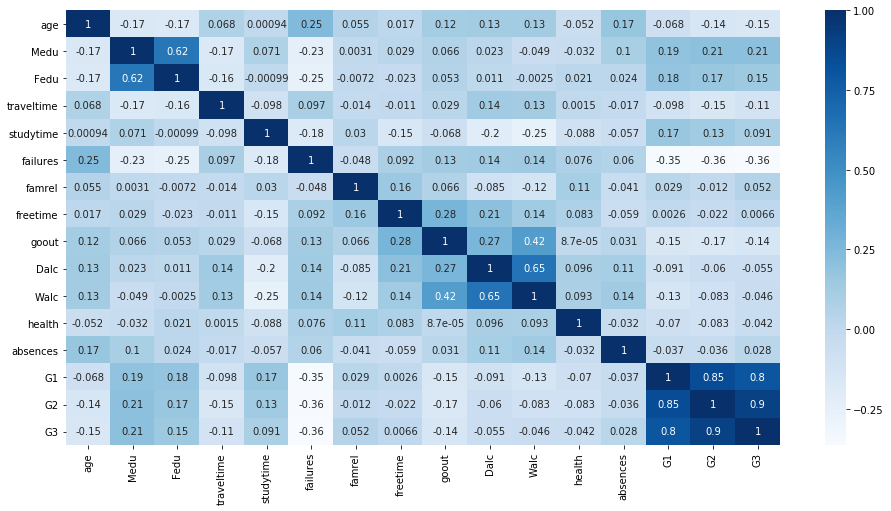

In [198]:
plt.figure(figsize = (16, 8))
sns.heatmap(corr_mat, cmap='Blues', annot=True)

#### Se inspeccionan los datos perdidos de la BD
* Se observa que las variables presentan datos perdidos de manera bastante similar.

school 0.013
sex 0.008
age 0.01
address 0.005
famsize 0.01
Pstatus 0.015
Medu 0.008
Fedu 0.013
Mjob 0.015
Fjob 0.0
reason 0.01
guardian 0.01
traveltime 0.008
studytime 0.013
failures 0.013
schoolsup 0.02
famsup 0.013
paid 0.003
activities 0.013
nursery 0.015
higher 0.015
internet 0.008
romantic 0.005
famrel 0.013
freetime 0.005
goout 0.013
Dalc 0.008
Walc 0.013
health 0.01
absences 0.01
G1 0.01
G2 0.0
G3 0.008


<Figure size 288x288 with 0 Axes>

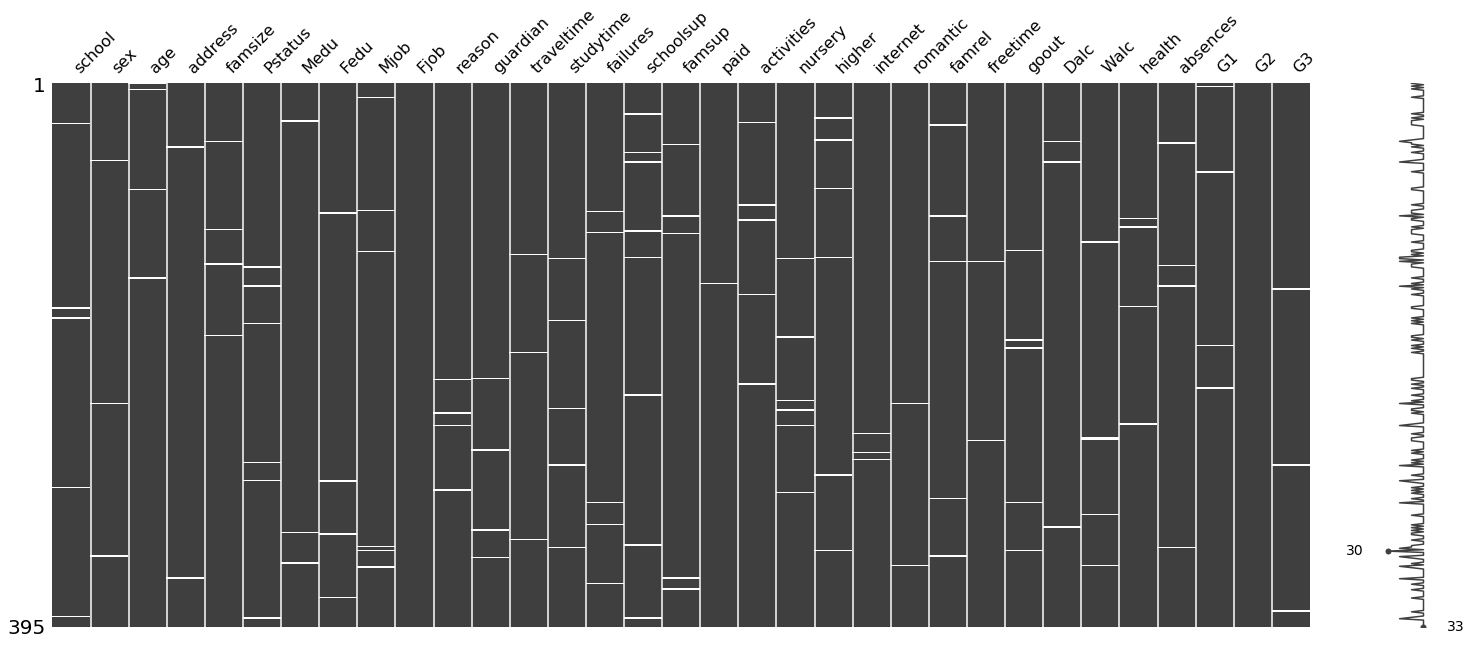

In [199]:
for colname, serie in df.iteritems():
    if serie.isna().value_counts('%')[False] == 1.0:
        print(colname, 0.0)
    else:
        print(colname, serie.isna().value_counts('%')[True].round(3))
        
plt.figure(figsize=(4,4))
msngo.matrix(df)

#### Se eliminan los registros nulos

In [200]:
df_dropna = df.copy().dropna().reset_index()

#### Se realiza la recodificación de las variables

In [201]:
# variables binarias
df_dropna['school'] = np.where(df_dropna['school'] == 'MS', 1, 0)
df_dropna['sex'] = np.where(df_dropna['sex'] == 'M', 1, 0)
df_dropna['address'] = np.where(df_dropna['address'] == 'R', 1, 0)
df_dropna['famsize'] = np.where(df_dropna['famsize'] == 'LE3', 1, 0)
df_dropna['Pstatus'] = np.where(df_dropna['Pstatus'] == 'A', 1, 0)
df_dropna['schoolsup'] = np.where(df_dropna['schoolsup'] == 'yes', 1, 0)
df_dropna['famsup'] = np.where(df_dropna['famsup'] == 'no', 1, 0)
df_dropna['paid'] = np.where(df_dropna['paid'] == 'yes', 1, 0)
df_dropna['activities'] = np.where(df_dropna['activities'] == 'no', 1, 0)
df_dropna['nursery'] = np.where(df_dropna['nursery'] == 'no', 1, 0)
df_dropna['higher'] = np.where(df_dropna['higher'] == 'no', 1, 0)
df_dropna['internet'] = np.where(df_dropna['internet'] == 'no', 1, 0)
df_dropna['romantic'] = np.where(df_dropna['romantic'] == 'yes', 1, 0)

# variables categoricas
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['Mjob'], drop_first=True, prefix='Mjob'))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['Fjob'], drop_first=True, prefix='Fjob'))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['reason'], drop_first=True, prefix='reason'))
df_dropna = df_dropna.join(pd.get_dummies(df_dropna['guardian'], drop_first=True, prefix='guardian'))

## Hito 3

### Modelación descriptiva

#### Se buscan factores latentes en preguntas con aspectos ambientales
* Se grafican las medias de cada pregunta. En el gráfico se distinguen dos grupos relacionados a preguntas sobre el consumo de alcohol y otro con las relaciones familiares y salud.
* Se grafican las correlaciones entre las preguntas. Se observa una alta correlación entre el consumo de alcohol los fines de semana y el consumo de alcohol durante la semana, y entre el consumo de alcohol los fines de semana y las salidas con amigos.
* La prueba de esferacidad nos indica que debemos rechazar la hipótesis nula y continuar con la extracción de factores dado el p-value cercano a 0
* Al realizar la prueba KMO obtenemos un puntaje global de 0.57 lo que nos indica que es inadecuado para el propósito de la búsqueda de factores latentes. Cada variable de manera individual presenta valores inferiores a 0.7 por lo que no podemos eliminar alguna de estas de la muestra.
* Seguiremos de todas formas con la búsqueda de factores latentes.

Prueba de esferacidad (264.4978629665067, 6.03816710126852e-48)
Prueba KMO (array([0.50173343, 0.57692329, 0.61683967, 0.58664172, 0.5554092 ,
       0.59265861]), 0.5767240731164592)


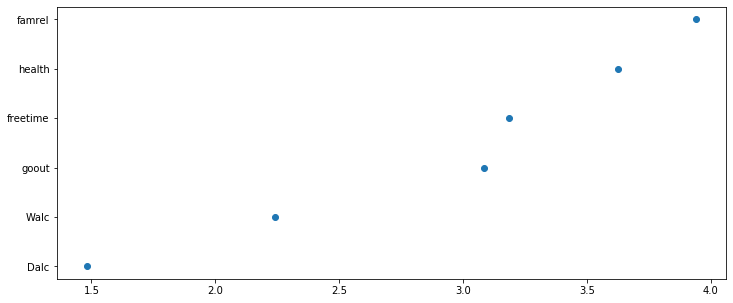

In [202]:
df_preguntas = df_dropna.loc[:, 'famrel':'health']

variable = []
mean = []
for colname, serie in df_preguntas.iteritems():
    variable.append(colname)
    mean.append(serie.mean())
    df_mean = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.figure(figsize=(12,5))
plt.plot(df_mean['mean'], df_mean['var'], 'o')
# prueba de esferacidad
print("Prueba de esferacidad", factor.calculate_bartlett_sphericity(df_preguntas))
# prueba KMO
print("Prueba KMO", factor.calculate_kmo(df_preguntas))

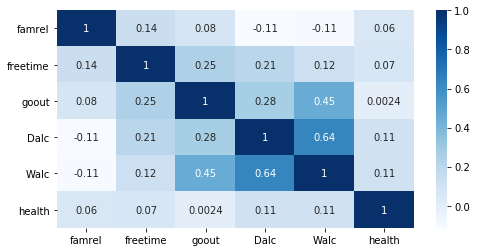

In [203]:
plt.figure(figsize=(8,4))
corr_mat = df_preguntas.corr()
sns.heatmap(corr_mat, cmap='Blues', annot=True)

##### Se consideran tres factores latentes aceptables sobre 1.

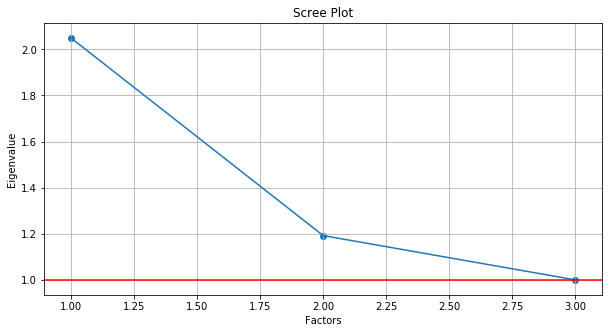

In [204]:
fa = factor.FactorAnalyzer(n_factors=3)
fa.fit(df_preguntas)
ev, v = fa.get_eigenvalues()
plt.figure(figsize=(10,5))
plt.scatter(range(1, 4), ev[:3])
plt.plot(range(1, 4), ev[:3])
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(1, color="r")
plt.grid()
plt.show()

##### Se extraen las cargas del modelo y se identifican los items asociados a cada factor
* El factor 0 está asociado al consumo de alcohol y salidas con amigos. El factor 1 está asociado a las salidas con amigos y el factor 2 está asociado con las relaciones familiares y tiempo libre fuera del colegio.
* La varianza acumulada de los factores indica que el modelo explica el 47% de la variabilidad de los datos.

In [205]:
factor1_values = fa.fit_transform(df_preguntas)
loadings = pd.DataFrame(fa.loadings_, index = df_preguntas.columns)
loadings.applymap(lambda x: np.where(x < .3, ' ', round(x, 2)))

,0,1,2
famrel,,,0.46
freetime,,,0.38
goout,,0.94,
Dalc,0.91,,
Walc,0.7,,
health,,,


In [206]:
factor_var = fa.get_factor_variance()
factor_var

(array([1.40386225, 0.96827203, 0.42065707]),
 array([0.23397704, 0.16137867, 0.07010951]),
 array([0.23397704, 0.39535571, 0.46546522]))

##### Se crea la nueva BD considerando las variables originales y los factores latentes

In [207]:
fa_scores = fa.transform(df_preguntas)
df_model = pd.DataFrame()
df_model['Alcohol'] = fa_scores[:, 0]
df_model['Amigos'] = fa_scores[:, 1]
df_model['Familia'] = fa_scores[:, 2]
df_model = df_model.join(df_dropna.loc[:, [
       'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
       'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'absences',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'G1', 'G2', 'G3']])
df_model.head(20)

,Alcohol,Amigos,Familia,school,sex,age,address,famsize,Pstatus,Medu,...,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G1,G2,G3
0,-0.649020,-0.057167,0.333547,0,0,17.0,0,0,0,1.0,...,0,0,0,0,0,0,0,5.0,5,6.0
1,-0.660148,-0.843683,-0.710901,0,0,15.0,0,0,0,4.0,...,1,0,1,0,0,1,0,15.0,14,15.0
2,-0.387650,-1.118082,0.549370,0,1,16.0,0,1,0,4.0,...,0,0,0,0,1,1,0,15.0,15,15.0
3,-0.574524,0.907062,0.375611,0,1,16.0,0,1,0,2.0,...,0,0,1,0,0,1,0,12.0,12,11.0
4,-0.779604,1.122614,-0.691883,0,0,17.0,0,0,1,4.0,...,0,1,1,0,0,1,0,6.0,5,6.0
5,-0.791258,-0.865185,-0.681642,0,1,15.0,0,1,1,3.0,...,0,0,1,0,0,1,0,16.0,18,19.0
6,-0.548319,-2.131911,0.821567,0,1,15.0,0,0,0,3.0,...,0,0,1,0,0,1,0,14.0,15,15.0
7,-0.691395,-0.965931,-0.012158,0,0,15.0,0,0,0,2.0,...,0,0,0,0,1,0,0,10.0,12,12.0
8,-0.227855,-0.037469,-0.117929,0,1,15.0,0,1,0,4.0,...,1,0,0,0,0,0,0,14.0,14,14.0
9,-0.424633,-0.133694,0.508757,0,1,15.0,0,0,0,4.0,...,0,0,0,0,0,1,0,10.0,10,11.0


#### Se crea modelo descriptivo con G1 como vector objetivo
* Las variables significativas al 95% son failures, Amigos, schoolsup, famsup

In [209]:
m1_ols = smf.ols('G1 ~ ' + " + ".join(df_model.drop(['G1', 'G2', 'G3'], axis=1).columns), df_model).fit()
m1_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.084
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.32e-07
Time:                        22:44:08   Log-Likelihood:                -687.91
No. Observations:                 284   AIC:                             1450.
Df Residuals:                     247   BIC:                             1585.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.1680      3.374      2.421      0.016       1.523      14.813
Alcohol              -0.0735      0.233     -0.315      0.753      -0.533       0.386
Amigos               -0.7008      0.203     -3.453      0.001      -1.100      -0.301
Familia               0.2331      0.340      0.686      0.494      -0.437       0.903
school               -0.2932      0.666     -0.440      0.660      -1.606       1.019
sex                   0.8057      0.427      1.889      0.060      -0.035       1.646
age                   0.0812      0.185      0.439      0.661      -0.284       0.446
address              -0.1147      0.489     -0.235      0.815      -1.078       0.848
famsize               0.3916      0.442      0.886      0.377      -0.479       1.263
Pstatus               0.0844      0.653      0.129      0.897      -1.203       1.371
Medu                  0.2188      0.278      0.787      0.432      -0.329       0.766
Fedu                  0.1446      0.237      0.611      0.542      -0.321       0.611
traveltime           -0.0472      0.292     -0.161      0.872      -0.623       0.529
studytime             0.4799      0.247      1.940      0.054      -0.007       0.967
failures             -1.1356      0.284     -3.998      0.000      -1.695      -0.576
schoolsup            -1.7538      0.568     -3.090      0.002      -2.872      -0.636
famsup                1.0150      0.414      2.452      0.015       0.200       1.830
paid                  0.0420      0.405      0.104      0.918      -0.756       0.840
activities            0.4364      0.370      1.180      0.239      -0.292       1.165
nursery               0.0726      0.457      0.159      0.874      -0.828       0.973
higher               -1.1447      0.882     -1.298      0.195      -2.881       0.592
internet             -0.1330      0.503     -0.264      0.792      -1.123       0.857
romantic             -0.1544      0.400     -0.386      0.700      -0.942       0.633
absences             -0.0045      0.024     -0.184      0.854      -0.053       0.044
Mjob_health           0.7483      0.902      0.830      0.407      -1.028       2.524
Mjob_other           -0.7340      0.595     -1.233      0.219      -1.906       0.438
Mjob_services         0.1083      0.666      0.163      0.871      -1.203       1.419
Mjob_teacher         -1.2576      0.828     -1.518      0.130      -2.889       0.374
Fjob_health          -1.0991      1.311     -0.838      0.403      -3.681       1.483
Fjob_other           -1.2947      0.981     -1.320      0.188      -3.226       0.637
Fjob_services        -0.7290      0.986     -0.739      0.461      -2.672       1.214
Fjob_teacher          0.9302      1.206      0.771      0.441      -1.445       3.306
reason_home           0.3592      0.474      0.759      0.449      -0.573

#### Se crea modelo descriptivo con G2 como vector objetivo
* Las variables significativas al 95% son G1, romantic y address

In [210]:
m2_ols = smf.ols('G2 ~ ' + " + ".join(df_model.drop(['G2', 'G3'], axis=1).columns), df_model).fit()
m2_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     23.01
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.40e-60
Time:                        22:44:19   Log-Likelihood:                -568.45
No. Observations:                 284   AIC:                             1213.
Df Residuals:                     246   BIC:                             1352.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0963      2.246      0.933      0.352      -2.328       6.520
Alcohol               0.0779      0.153      0.508      0.612      -0.224       0.380
Amigos               -0.0997      0.137     -0.729      0.467      -0.369       0.170
Familia              -0.4004      0.224     -1.788      0.075      -0.841       0.041
school                0.6349      0.439      1.448      0.149      -0.229       1.499
sex                   0.1851      0.283      0.655      0.513      -0.372       0.742
age                  -0.1439      0.122     -1.180      0.239      -0.384       0.096
address              -0.7556      0.322     -2.349      0.020      -1.389      -0.122
famsize               0.1779      0.291      0.611      0.542      -0.396       0.752
Pstatus               0.3642      0.430      0.847      0.398      -0.483       1.211
Medu                  0.1314      0.183      0.717      0.474      -0.229       0.492
Fedu                 -0.2617      0.156     -1.680      0.094      -0.568       0.045
traveltime           -0.1989      0.192     -1.034      0.302      -0.578       0.180
studytime            -0.0870      0.164     -0.530      0.596      -0.410       0.236
failures             -0.0242      0.193     -0.125      0.900      -0.404       0.356
schoolsup             0.6862      0.381      1.803      0.073      -0.063       1.436
famsup                0.0133      0.276      0.048      0.961      -0.530       0.556
paid                  0.4583      0.267      1.719      0.087      -0.067       0.983
activities           -0.2758      0.244     -1.130      0.260      -0.756       0.205
nursery              -0.1388      0.301     -0.461      0.645      -0.732       0.454
higher               -0.0326      0.582     -0.056      0.955      -1.179       1.114
internet             -0.3754      0.331     -1.134      0.258      -1.027       0.276
romantic             -0.6637      0.263     -2.521      0.012      -1.182      -0.145
absences             -0.0018      0.016     -0.109      0.913      -0.033       0.030
Mjob_health           0.2590      0.594      0.436      0.663      -0.911       1.429
Mjob_other            0.4154      0.393      1.057      0.291      -0.358       1.189
Mjob_services         0.0855      0.438      0.195      0.845      -0.777       0.948
Mjob_teacher          0.0681      0.548      0.124      0.901      -1.010       1.147
Fjob_health           0.6905      0.864      0.799      0.425      -1.011       2.392
Fjob_other            0.9031      0.648      1.395      0.164      -0.372       2.179
Fjob_services         1.1619      0.650      1.788      0.075      -0.118       2.442
Fjob_teacher          0.2703      0.795      0.340      0.734      -1.295       1.835
reason_home           0.0963      0.312      0.309      0.758      -0.518

#### Se crea modelo descriptivo con G3 como vector objetivo
* Las variables significativas al 95% son G1, G2 y absences

In [211]:
m3_ols = smf.ols('G3 ~ ' + " + ".join(df_model.drop(['G3'], axis=1).columns), df_model).fit()
m3_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     34.89
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.56e-78
Time:                        22:45:33   Log-Likelihood:                -569.92
No. Observations:                 284   AIC:                             1218.
Df Residuals:                     245   BIC:                             1360.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2532      2.266     -0.112      0.911      -4.717       4.211
Alcohol              -0.0801      0.155     -0.518      0.605      -0.385       0.224
Amigos               -0.1122      0.138     -0.814      0.417      -0.384       0.159
Familia               0.4229      0.227      1.863      0.064      -0.024       0.870
school                0.6999      0.444      1.578      0.116      -0.174       1.574
sex                   0.1809      0.285      0.635      0.526      -0.380       0.742
age                  -0.0999      0.123     -0.811      0.418      -0.342       0.143
address              -0.1727      0.328     -0.527      0.599      -0.818       0.473
famsize              -0.1065      0.294     -0.363      0.717      -0.685       0.472
Pstatus               0.3254      0.434      0.750      0.454      -0.529       1.180
Medu                  0.0729      0.185      0.395      0.693      -0.291       0.437
Fedu                 -0.1595      0.158     -1.011      0.313      -0.470       0.151
traveltime            0.1181      0.194      0.608      0.544      -0.264       0.500
studytime            -0.1105      0.165     -0.669      0.504      -0.436       0.215
failures             -0.1840      0.194     -0.947      0.344      -0.567       0.199
schoolsup             0.1744      0.386      0.452      0.652      -0.586       0.934
famsup               -0.2000      0.278     -0.720      0.472      -0.747       0.347
paid                  0.1438      0.270      0.532      0.595      -0.388       0.676
activities            0.2759      0.246      1.120      0.264      -0.210       0.761
nursery               0.1346      0.303      0.444      0.658      -0.463       0.732
higher               -0.5143      0.586     -0.877      0.381      -1.669       0.640
internet              0.0621      0.334      0.186      0.853      -0.596       0.720
romantic             -0.2055      0.269     -0.765      0.445      -0.734       0.323
absences              0.0478      0.016      2.952      0.003       0.016       0.080
Mjob_health          -0.0097      0.599     -0.016      0.987      -1.189       1.169
Mjob_other            0.2621      0.397      0.661      0.509      -0.519       1.043
Mjob_services         0.1697      0.441      0.385      0.701      -0.699       1.039
Mjob_teacher          0.0104      0.552      0.019      0.985      -1.076       1.097
Fjob_health           0.1779      0.871      0.204      0.838      -1.538       1.894
Fjob_other           -0.1213      0.655     -0.185      0.853      -1.411       1.169
Fjob_services        -0.2891      0.659     -0.439      0.661      -1.586       1.008
Fjob_teacher         -0.2878      0.800     -0.360      0.719      -1.864       1.289
reason_home          -0.2607      0.314     -0.830      0.408      -0.880

#### Se crea modelo descriptivo con G3 como vector objetivo considerando las variables significativas para explicar G1, G2 y G3
* Las variables significativas al 95% son G2 y absences

In [212]:
m4_ols = smf.ols('G3 ~ G1 + G2 + failures + schoolsup + famsup + Amigos + romantic + address + absences', df_model).fit()
m4_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     147.5
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.23e-99
Time:                        22:47:24   Log-Likelihood:                -583.02
No. Observations:                 284   AIC:                             1186.
Df Residuals:                     274   BIC:                             1223.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5711      0.491     -3.202      0.002      -2.537      -0.605
G1             0.1860      0.069      2.694      0.007       0.050       0.322
G2             0.9328      0.060     15.675      0.000       0.816       1.050
failures      -0.3247      0.169     -1.926      0.055      -0.657       0.007
schoolsup      0.1276      0.351      0.364      0.716      -0.563       0.818
famsup        -0.1402      0.238     -0.589      0.556      -0.608       0.328
Amigos        -0.0542      0.121     -0.449      0.654      -0.292       0.183
romantic      -0.2821      0.251     -1.125      0.262      -0.776       0.212
address        0.0900      0.272      0.330      0.741      -0.446       0.626
absences       0.0401      0.014      2.819      0.005       0.012       0.068
==============================================================================
Omnibus:                      183.148   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.681
Skew:                          -2.653   Prob(JB):                    4.61e-297
Kurtosis:                      12.337   Cond. No.                         78.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Se crea modelo descriptivo eliminando preguntas con factores del entorno del alumno
* Las variables significativas al 95% son G1, G2 y absences

In [213]:
df_model2 = df_dropna.loc[:, [
       'school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
       'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
       'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'absences',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation',
       'guardian_mother', 'guardian_other', 'G1', 'G2', 'G3']]
df_model2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,G1,G2,G3
0,0,0,17.0,0,0,0,1.0,1.0,1.0,2.0,...,0,0,0,0,0,0,0,5.0,5,6.0
1,0,0,15.0,0,0,0,4.0,2.0,1.0,3.0,...,1,0,1,0,0,1,0,15.0,14,15.0
2,0,1,16.0,0,1,0,4.0,3.0,1.0,2.0,...,0,0,0,0,1,1,0,15.0,15,15.0
3,0,1,16.0,0,1,0,2.0,2.0,1.0,2.0,...,0,0,1,0,0,1,0,12.0,12,11.0
4,0,0,17.0,0,0,1,4.0,4.0,2.0,2.0,...,0,1,1,0,0,1,0,6.0,5,6.0


In [214]:
m5_ols = smf.ols('G3 ~ ' + " + ".join(df_model.drop('G3', axis=1).columns), df_model).fit()
m5_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     34.89
Date:                Fri, 26 Jul 2019   Prob (F-statistic):           1.56e-78
Time:                        22:49:23   Log-Likelihood:                -569.92
No. Observations:                 284   AIC:                             1218.
Df Residuals:                     245   BIC:                             1360.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.2532      2.266     -0.112      0.911      -4.717       4.211
Alcohol              -0.0801      0.155     -0.518      0.605      -0.385       0.224
Amigos               -0.1122      0.138     -0.814      0.417      -0.384       0.159
Familia               0.4229      0.227      1.863      0.064      -0.024       0.870
school                0.6999      0.444      1.578      0.116      -0.174       1.574
sex                   0.1809      0.285      0.635      0.526      -0.380       0.742
age                  -0.0999      0.123     -0.811      0.418      -0.342       0.143
address              -0.1727      0.328     -0.527      0.599      -0.818       0.473
famsize              -0.1065      0.294     -0.363      0.717      -0.685       0.472
Pstatus               0.3254      0.434      0.750      0.454      -0.529       1.180
Medu                  0.0729      0.185      0.395      0.693      -0.291       0.437
Fedu                 -0.1595      0.158     -1.011      0.313      -0.470       0.151
traveltime            0.1181      0.194      0.608      0.544      -0.264       0.500
studytime            -0.1105      0.165     -0.669      0.504      -0.436       0.215
failures             -0.1840      0.194     -0.947      0.344      -0.567       0.199
schoolsup             0.1744      0.386      0.452      0.652      -0.586       0.934
famsup               -0.2000      0.278     -0.720      0.472      -0.747       0.347
paid                  0.1438      0.270      0.532      0.595      -0.388       0.676
activities            0.2759      0.246      1.120      0.264      -0.210       0.761
nursery               0.1346      0.303      0.444      0.658      -0.463       0.732
higher               -0.5143      0.586     -0.877      0.381      -1.669       0.640
internet              0.0621      0.334      0.186      0.853      -0.596       0.720
romantic             -0.2055      0.269     -0.765      0.445      -0.734       0.323
absences              0.0478      0.016      2.952      0.003       0.016       0.080
Mjob_health          -0.0097      0.599     -0.016      0.987      -1.189       1.169
Mjob_other            0.2621      0.397      0.661      0.509      -0.519       1.043
Mjob_services         0.1697      0.441      0.385      0.701      -0.699       1.039
Mjob_teacher          0.0104      0.552      0.019      0.985      -1.076       1.097
Fjob_health           0.1779      0.871      0.204      0.838      -1.538       1.894
Fjob_other           -0.1213      0.655     -0.185      0.853      -1.411       1.169
Fjob_services        -0.2891      0.659     -0.439      0.661      -1.586       1.008
Fjob_teacher         -0.2878      0.800     -0.360      0.719      -1.864       1.289
reason_home          -0.2607      0.314     -0.830      0.408      -0.880

## Hito 4

### Modelación predictiva

### Modelo 1: Se consideran variables al 95% de confianza
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción
* Se reporta las métricas de MSE y R2

In [216]:
X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, ['G2', 'absences']], df_model.loc[:, 'G3'], test_size=.33, random_state=11238)
modelo = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo.fit(X_train, y_train)
y_hat = modelo.predict(X_test)
m_mse = mean_squared_error(y_test, y_hat).round(1)
m_r2 = r2_score(y_test, y_hat).round(2)
print("Mean Squared Error: ", m_mse)
print("R-cuadrado: ", m_r2)

Mean Squared Error:  4.1
R-cuadrado:  0.8


### Modelo 2: Se consideran solo G1 y G2
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción
* Se reporta las métricas de MSE y R2

In [217]:
X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, ['G1', 'G2']], df_model.loc[:, 'G3'], test_size=.33, random_state=11238)
modelo = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo.fit(X_train, y_train)
y_hat = modelo.predict(X_test)
m_mse = mean_squared_error(y_test, y_hat).round(1)
m_r2 = r2_score(y_test, y_hat).round(2)
print("Mean Squared Error: ", m_mse)
print("R-cuadrado: ", m_r2)

Mean Squared Error:  4.2
R-cuadrado:  0.8


### Modelo 3: Se consideran variables significativas al 95% sin los factores latentes
* Se genere subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación.
* Se genera la predicción
* Se reporta las métricas de MSE y R2

In [218]:
X_train, X_test, y_train, y_test = train_test_split(df_model.loc[:, ['G1', 'G2', 'absences']], df_model.loc[:, 'G3'], test_size=.33, random_state=11238)
modelo = linear_model.LinearRegression(fit_intercept=True, normalize=True)
modelo.fit(X_train, y_train)
y_hat = modelo.predict(X_test)
m_mse = mean_squared_error(y_test, y_hat).round(1)
m_r2 = r2_score(y_test, y_hat).round(2)
print("Mean Squared Error: ", m_mse)
print("R-cuadrado: ", m_r2)

Mean Squared Error:  4.0
R-cuadrado:  0.8


### Conclusiones
#### Modelo 1
El modelo considera 2 variables independientes que corresponden a las que explican a la variable dependiente al 95% de confianza. El modelo presenta indicadores de MSE: 4.1 y R2: 0.8, los cuales son adecuados.

#### Modelo 2
El modelo considera 2 variables independientes que corresponden al promedio del primer y segundo semestre. El modelo presenta indicadores de MSE: 4.2 y R2:0.8, los cuales son adecuados pero levemente inferior al Modelo 1 pues el MSE es mayor.

#### Modelo 3
El modelo considera 3 variables independientes que corresponden a las que explican a la variable dependiente al 95% de confianza, dejando fuera del modelo las preguntas de factores ambientales de los alumnos. El modelo presenta indicadores de MSE: 4.0 y R2: 0.8, los cuales son adecuados y levemente superiores a los modelos anteriores. Este modelo presenta un menor MSE, un R2 simular pero incluye una variable más, por lo que el rendimiento es inferior a los anteriores.